# NBA Player Shot Charts

In [18]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players

In [19]:
# Search for the player by name
player_name = "LeBron James"
player_info = players.find_players_by_full_name(player_name)
player_info  # This will display the player's info

[{'id': 2544,
  'full_name': 'LeBron James',
  'first_name': 'LeBron',
  'last_name': 'James',
  'is_active': True}]

In [20]:
# Extract player ID
player_id = player_info[0]['id']
player_id

2544

In [25]:
# Fetch shot data for the 2023-24 NBA season
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable='2023-24',
    season_type_all_star='Regular Season'
)

# Convert the shot data into a DataFrame
shot_df = shot_data.get_data_frames()[0]
shot_df.head()  # Show the first few rows

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300015,11,2544,LeBron James,1610612747,Los Angeles Lakers,1,11,12,...,Center(C),Less Than 8 ft.,0,2,5,1,1,20231110,PHX,LAL
1,Shot Chart Detail,0022300015,36,2544,LeBron James,1610612747,Los Angeles Lakers,1,9,0,...,Center(C),Less Than 8 ft.,0,1,8,1,1,20231110,PHX,LAL
2,Shot Chart Detail,0022300015,238,2544,LeBron James,1610612747,Los Angeles Lakers,2,7,55,...,Center(C),Less Than 8 ft.,0,-6,1,1,1,20231110,PHX,LAL
3,Shot Chart Detail,0022300015,284,2544,LeBron James,1610612747,Los Angeles Lakers,2,6,13,...,Center(C),Less Than 8 ft.,1,13,9,1,1,20231110,PHX,LAL
4,Shot Chart Detail,0022300015,301,2544,LeBron James,1610612747,Los Angeles Lakers,2,5,14,...,Center(C),24+ ft.,25,0,251,1,1,20231110,PHX,LAL


In [22]:
# Check columns in the DataFrame
shot_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

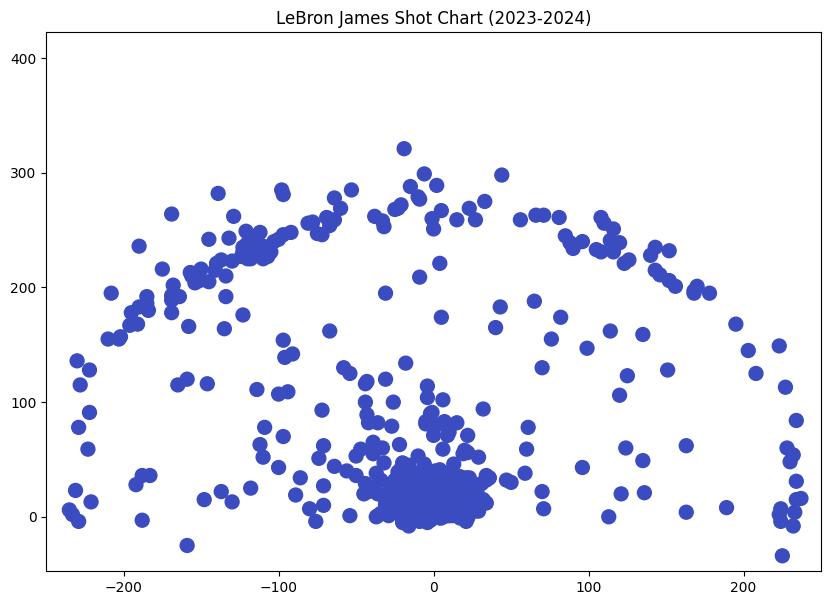

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot for the shot locations
plt.figure(figsize=(10, 7))
plt.scatter(shot_df['LOC_X'], shot_df['LOC_Y'], c=shot_df['SHOT_MADE_FLAG'], cmap='coolwarm', s=100)
plt.xlim(-250, 250)  # NBA court width is approximately 500 units (from -250 to 250)
plt.ylim(-47.5, 422.5)  # NBA court length is approximately 470 units (half-court view)
plt.title(f"{player_name} Shot Chart (2023-2024)")
plt.show()